In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as plot
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [2]:
cancer = load_breast_cancer()
features = pd.DataFrame(cancer.data,columns=cancer.feature_names)
target = pd.DataFrame(cancer.target,columns=['TARGET'])
data = pd.concat([features,target], axis=1)
a = data.corr('pearson')
a.loc['TARGET'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [3]:
x = np.array(data['worst concave points'])
x1 = np.array(data['worst perimeter'])
y = np.array(data['TARGET'])

x = x/x.mean()
x1 = x1/x1.mean()

div = int(0.8 * len(x))

x_train = x[:div]
x1_train = x[:div]
y_train = y[:div]

x_test = x[div:]
x1_test = x1[div:]
y_test = y[div:]

Text(0.5,0,'TARGET')

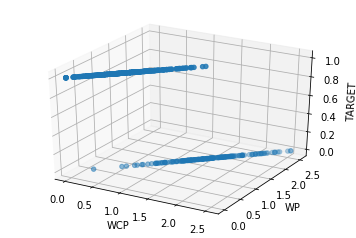

In [4]:
threedee1 = plt.figure().gca(projection='3d')
threedee1.scatter(x_train,x1_train,y_train)
threedee1.set_xlabel('WCP')
threedee1.set_ylabel('WP')
threedee1.set_zlabel('TARGET')

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sqerror(a,b,c,x,x1,y):
    error = 0
    N = len(x)
    for i in range(N):
        f = (a*x[i])+(b*x1[i])+c
        error += (y[i]-sigmoid(f))**2
    return (1/N) * error

def step_gradient(a,b,c,x,x1,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x)
    for i in range(m):
        f = (a*x[i])+(b*x1[i])+c
        grad_a += (sigmoid(f)-y[i])*x[i]
        grad_b += (sigmoid(f)-y[i])*x1[i]
        grad_c += (sigmoid(f)-y[i])
    
    a = a-(grad_a*learning_rate)
    b = b-(grad_b*learning_rate)
    c = c-(grad_c*learning_rate)
    return a,b,c

def descend(initial_a,initial_b,initial_c,x,x1,y,learning_rate,iterations):
    a,b,c = initial_a,initial_b,initial_c
    for i in range(iterations):
        if i % 1000 == 0:
            e = sqerror(a,b,c,x,x1,y)
            print("Error: %.5f, a: %.5f, b: %.5f, c: %.5f"%(e,a,b,c))
        a,b,c = step_gradient(a,b,c,x,x1,y,learning_rate)
    return a,b,c

In [6]:
a,b,c = -10.70967,3.86064,7.72128
learning_rate = 0.001
iterations = 10000

final_a,final_b,final_c = descend(a,b,c,x_train,x1_train,y_train,learning_rate,iterations)

Error: 0.06663, a: -10.70967, b: 3.86064, c: 7.72128
Error: 0.06663, a: -10.70967, b: 3.86064, c: 7.72128
Error: 0.06663, a: -10.70967, b: 3.86064, c: 7.72128
Error: 0.06663, a: -10.70967, b: 3.86064, c: 7.72128
Error: 0.06663, a: -10.70967, b: 3.86064, c: 7.72128
Error: 0.06663, a: -10.70967, b: 3.86064, c: 7.72128
Error: 0.06663, a: -10.70967, b: 3.86064, c: 7.72128
Error: 0.06663, a: -10.70967, b: 3.86064, c: 7.72128
Error: 0.06663, a: -10.70967, b: 3.86064, c: 7.72128
Error: 0.06663, a: -10.70967, b: 3.86064, c: 7.72128


Text(0.5,0,'TARGET')

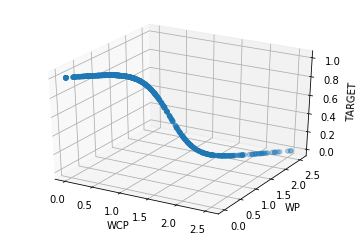

In [7]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(x_train,x1_train,sigmoid(final_a*x_train+final_b*x1_train+final_c))
threedee.set_xlabel('WCP')
threedee.set_ylabel('WP')
threedee.set_zlabel('TARGET')

In [8]:
correct = 0
for i in range(len(x_test)):
    f = final_a * x_test[i] + final_b * x1_test[i] + final_c
    s = float(sigmoid(f))
    if s >= 0.5:
        z = 1
    else:
        z = 0
    if z == y_test[i]:
        correct += 1
error = float(1-(correct/len(y_test)))
print('Error: {}'.format(error))

Error: 0.11403508771929827
